<a href="https://colab.research.google.com/github/thabetAljbreen/RepoT5/blob/main/How_to_find_Correlations_in_Data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Hi , we will learn how to find a Correlation in our datasets.**

### **Let's get started: **

### **Import our Libraries**

In [10]:
import pandas as pd # To read and analysis our data
import seaborn as sns # to see correlation in the dataset using Heat map
import matplotlib.pyplot as plt # to Visualize our dataset
import numpy as np


### **Read data set and display our dataset**



In [5]:
df = pd.read_csv("/content/Expanded_data_with_more_features.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### **Explanation of the Dataset**

so we have 14 Columns , we can see that this is a Dataset for students preformence.

`Gender` : Male or Female.

`EthnicGroup` : which group this student belongs to.

`ParentEduc` : Education of parents students.

`LunchType` : Launch type of the students.

`TestPrep` : do the student do a test prepreation before the exam or not.

`ParentMaritalStatus` : is the parents married or devorsed.

`PracticeSport` : dose the student practies support or not.

`IsFirstChild` : is this student the first child [Y/N].

`NrSiblings` : Number of sbilings.

`TransportMeans ` : How do the students go to school.


`WklyStudyHours` : Number of Hours they studes Weekly.

`MathScore` : Degree in math test.

`ReadingScore`: Degree in English Reading test.   

`WritingScore` : Degree in English Writing test.



















In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## **Let's do some EDA :**

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### **we have so many nulls value ...**

### **let's handle them :**

In [7]:
df["EthnicGroup"].fillna("Other" , inplace =True)
# if they don't belong to any existing group that's mean they belong to 'Other' Gropups iiiiiiiiiiiiiiiii It is wrong

In [8]:
df["ParentEduc"].fillna("Other" , inplace =True)
# if they don't have any existing Education that's mean they belong to 'Other'parent Education

In [9]:
df["TestPrep"].mode()
#check the mode if it's possible to fill it with mode.

0    none
Name: TestPrep, dtype: object

In [10]:
df["TestPrep"].fillna("Unkown" , inplace =True)
#Fill the null with 'Unkown' 'cause we don't know if they did the test prep or no.

In [11]:
df['NrSiblings'] = df['NrSiblings'].astype(pd.Int64Dtype())
#change type of Number of Siblings to int so we can see the max , min , mean and count
#let's describe df

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.0,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.0,0.000000,10.000000,4.000000
25%,249.000000,1.0,56.000000,59.000000,58.000000
50%,500.000000,2.0,67.000000,70.000000,69.000000
75%,750.000000,3.0,78.000000,80.000000,79.000000
max,999.000000,7.0,100.000000,100.000000,100.000000


In [12]:
#we can see that the number of Siblings mean is 2 so :
df['NrSiblings'].fillna(2, inplace=True)

In [13]:
df["WklyStudyHours"].mode()
#check the mode

0    5 - 10
Name: WklyStudyHours, dtype: object

In [14]:
df['WklyStudyHours'].fillna(5 - 10, inplace=True)
#fill the null '5 - 10'

In [15]:
df["ParentMaritalStatus"].mode()
#check the mode

0    married
Name: ParentMaritalStatus, dtype: object

In [16]:
df['ParentMaritalStatus'].fillna("married", inplace=True)
#fill the null 'married'

In [17]:
df['IsFirstChild'].fillna("Unkown", inplace=True)
# we don't know if this student if he/she the 1st child or not.

In [18]:
df["PracticeSport"].mode()
#check the mode

0    sometimes
Name: PracticeSport, dtype: object

In [19]:
df['PracticeSport'].fillna("sometimes", inplace=True)
# fill with the mode

In [20]:
df["TransportMeans"].mode()
#check the mode

0    school_bus
Name: TransportMeans, dtype: object

In [21]:
df['TransportMeans'].fillna("school_bus", inplace=True)
# fill with the mode

In [22]:
# now we check if the dataset still have nulls value or no
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### **That's great , now we can findout what is the Correlations?**

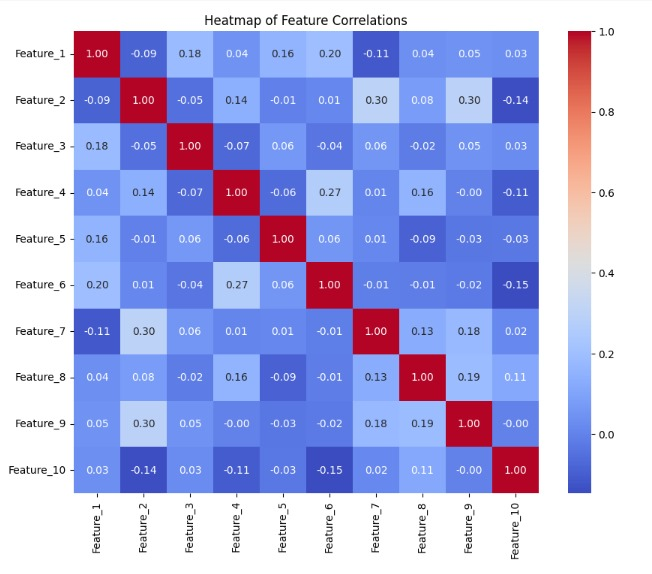

`Correlations` : is a statistical measure that expresses the extent to which two variables are linearly related.


We can find Correlations from the Features (Columns) in this dataset using heat map from seaborne lib. Let's see how it works:


### Do you think the parent Education might effect in the students score?
# Let's see :)

In [ ]:
# create a new df we can call it df1 to make a groupby bettwen ParentEduc and the mean of the score of each test like this :

df1=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df1)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
Other               66.645528     69.225474     68.295935
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


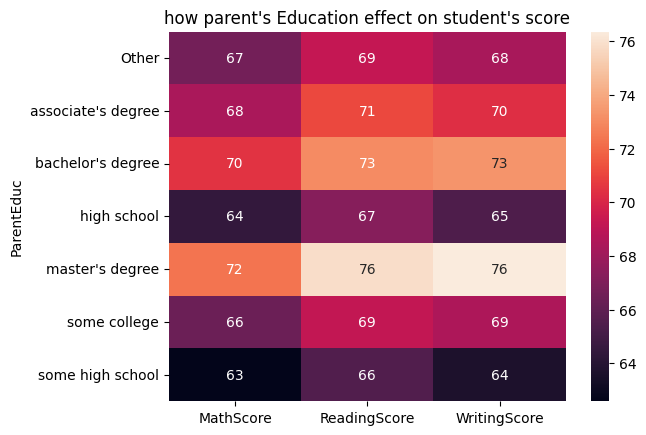

In [ ]:
# now we can do the heatmap :

sns.heatmap(df1 , annot= True)
plt.title("how parent's Education effect on student's score")
plt.show()

**Now we can see the correlations bettwen the parents who have master degree the students Scores.**

**So we can findout : That the student's who have High scores there parents have master dgree.**



#**Now it's your turn to find out more correlations the same way we did before**
###**Fill the '-----' with your thoughts.**

In [23]:
df2=df.groupby("Gender").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df2)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


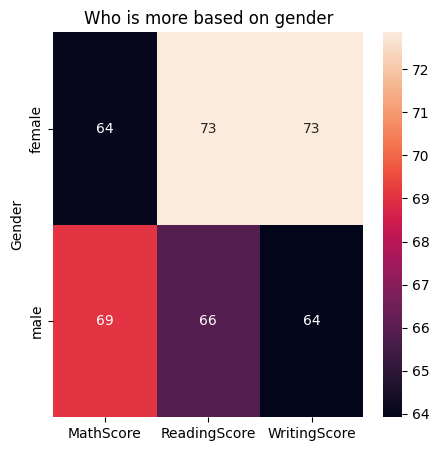

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(df2 , annot= True)
plt.title("Who is more based on gender")
plt.show()

#**Now you can start working in finding out the Correlations with your own :**

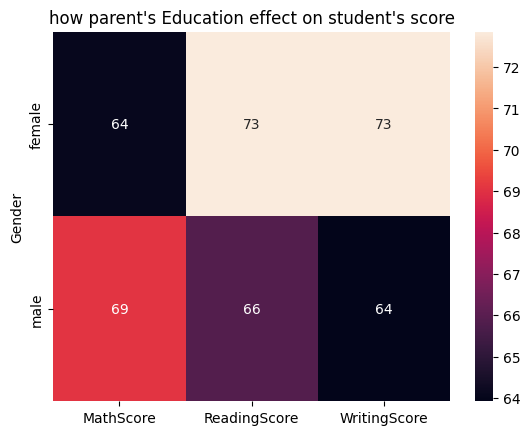

In [25]:
sns.heatmap(df2 , annot= True)
plt.title("how parent's Education effect on student's score")
plt.show()

In [26]:
df3=df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} )
print(df3)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0           66.819449     69.547812     68.746515
1           66.473896     69.259097     68.245345
2           66.512557     69.425257     68.441402
3           66.719092     69.488159     68.650498
4           66.245495     69.144169     68.073444
5           66.630303     69.453788     68.282576
6           65.917219     68.801325     67.860927
7           67.615120     69.828179     68.986254


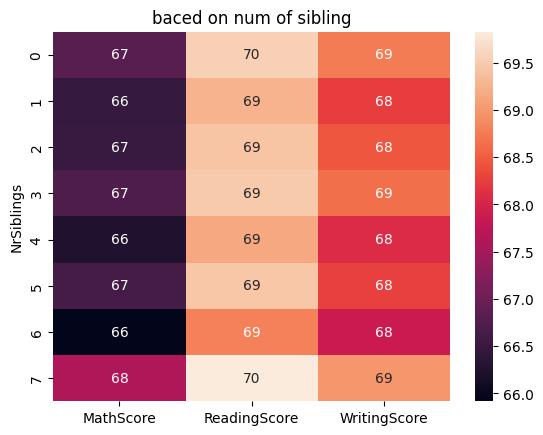

In [27]:
sns.heatmap(df3 , annot= True)
plt.title("baced on num of sibling")
plt.show()

In [28]:

df4=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} , inplace = True)
print(df4)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
-5              66.664921     69.545550     68.771728
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


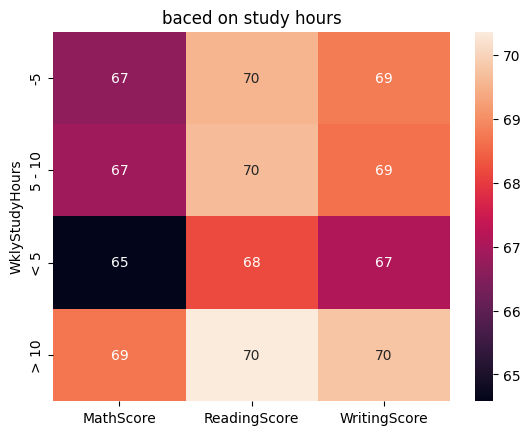

In [29]:
sns.heatmap(df4 , annot= True)
plt.title("baced on study hours")
plt.show()

In [13]:
for col in ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings', 'WklyStudyHours']:
  df[col] = pd.to_numeric(df[col], errors='coerce')



# Convert all columns to numeric before calculating the mean
df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(df.mean(), inplace=True)

df.drop_duplicates(inplace=True)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.000000    66.819449     69.547812     68.746515
1.000000    66.471942     69.256969     68.244309
2.000000    66.555539     69.472599     68.521951
2.145894    66.329517     69.223282     68.090967
3.000000    66.718347     69.487665     68.650384
4.000000    66.245495     69.144169     68.073444
5.000000    66.630303     69.453788     68.282576
6.000000    65.917219     68.801325     67.860927
7.000000    67.615120     69.828179     68.986254


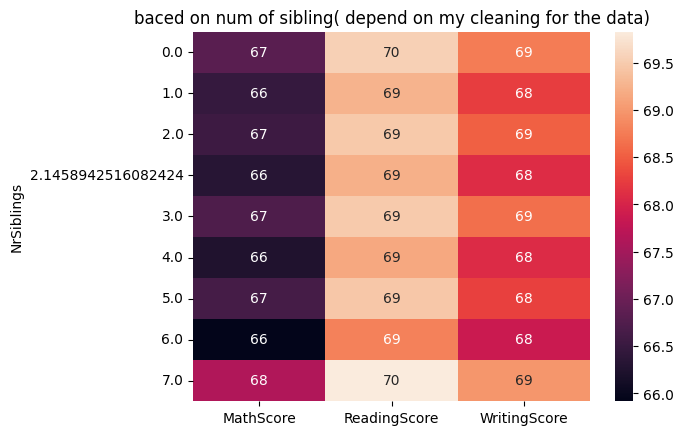

In [14]:
df5=df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'} )
print(df5)
sns.heatmap(df5 , annot= True)
plt.title("baced on num of sibling( depend on my cleaning for the data)")
plt.show()